<a href="https://colab.research.google.com/github/AnwHus007/NLP/blob/main/Word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [2]:
vocab_size = 100
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[88, 66], [74, 41], [82, 81], [91, 97, 17], [76, 11, 59], [16, 66], [14, 11, 35], [94, 11], [94, 58], [58, 41]]


In [49]:
from collections import Counter

word_counts = Counter()
for review in reviews:
  for word in review.split():
    word_counts[word] += 1

unique_words = list(word_counts.keys())


unique_words_string = ' '.join(map(str, unique_words))
unique_words_array = unique_words_string.split(' ')
print(unique_words_array)


['nice', 'food', 'amazing', 'restaurant', 'too', 'good', 'just', 'loved', 'it!', 'will', 'go', 'again', 'horrible', 'never', 'there', 'poor', 'service', 'quality', 'needs', 'improvement']


In [56]:
encoded_word_counts = Counter()
for encoded_review in encoded_reviews:
  for word in encoded_review:
    encoded_word_counts[word] += 1

unique_encoded_words = list(encoded_word_counts.keys())
unique_encoded_words_string = ' '.join(map(str, unique_encoded_words))
unique_encoded_words_array = unique_encoded_words_string.split(' ')
unique_encoded_words_array = [int(i) for i in unique_encoded_words_array]
print(unique_encoded_words_array)


[88, 66, 74, 41, 82, 81, 91, 97, 17, 76, 11, 59, 16, 14, 35, 94, 58]


In [57]:
mapping = dict(zip(unique_encoded_words_array, unique_words_array))
print(mapping)

{88: 'nice', 66: 'food', 74: 'amazing', 41: 'restaurant', 82: 'too', 81: 'good', 91: 'just', 97: 'loved', 17: 'it!', 76: 'will', 11: 'go', 59: 'again', 16: 'horrible', 14: 'never', 35: 'there', 94: 'poor', 58: 'service'}


In [3]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[88 66  0  0]
 [74 41  0  0]
 [82 81  0  0]
 [91 97 17  0]
 [76 11 59  0]
 [16 66  0  0]
 [14 11 35  0]
 [94 11  0  0]
 [94 58  0  0]
 [58 41  0  0]]


In [4]:
embeded_vector_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [5]:
X = padded_reviews
y = sentiment

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 5)              500       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [7]:
model.fit(X, y, epochs=50, verbose=0)

In [8]:
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 [==============================] - 0s 179ms/step - loss: 0.6102 - accuracy: 1.0000


1.0

In [9]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

100

In [10]:
weights.shape

(100, 5)

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

weights = model.get_layer('embedding').get_weights()[0]
similarity_matrix = cosine_similarity(weights)
print(similarity_matrix.shape)

(100, 100)


In [17]:
import pandas as pd
df = pd.DataFrame(similarity_matrix)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,-0.121005,0.601596,0.243957,-0.520697,-0.059470,-0.412285,-0.852856,0.509477,-0.182768,...,-0.143970,-0.368469,-0.034234,0.506343,0.197254,-0.364712,0.124222,-0.051193,-0.010091,-0.254999
1,-0.121005,1.000000,0.388213,-0.030098,-0.235129,0.699642,0.334019,-0.216417,-0.346123,-0.030845,...,-0.479554,0.054419,0.377737,0.116122,-0.175448,-0.116642,-0.409130,0.931163,-0.419132,-0.678264
2,0.601596,0.388213,1.000000,0.117490,-0.661868,0.708855,-0.153219,-0.640331,-0.092488,0.051321,...,-0.007953,-0.119350,0.385880,0.380640,0.319651,-0.718487,-0.206621,0.623031,-0.472135,-0.635180
3,0.243957,-0.030098,0.117490,1.000000,0.119298,-0.333297,0.697544,-0.585822,0.201437,-0.940012,...,0.233384,0.772276,0.742038,0.783260,-0.681270,0.433104,0.873802,-0.126754,0.573535,-0.151024
4,-0.520697,-0.235129,-0.661868,0.119298,1.000000,-0.430547,0.161120,0.526415,0.449482,-0.041884,...,0.585443,0.221967,0.202376,0.193455,-0.039572,0.296602,0.476971,-0.425150,0.793203,-0.018227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.364712,-0.116642,-0.718487,0.433104,0.296602,-0.681352,0.664873,0.091847,-0.117952,-0.664861,...,-0.279948,0.567254,-0.006033,-0.057518,-0.880794,1.000000,0.459641,-0.384007,0.412163,0.544645
96,0.124222,-0.409130,-0.206621,0.873802,0.476971,-0.629226,0.488949,-0.287313,0.459866,-0.775951,...,0.522999,0.655674,0.554725,0.702268,-0.495972,0.459641,1.000000,-0.528295,0.862305,0.051865
97,-0.051193,0.931163,0.623031,-0.126754,-0.425150,0.901402,0.198930,-0.212337,-0.476971,0.137164,...,-0.362027,-0.001369,0.375425,0.040220,0.038417,-0.384007,-0.528295,1.000000,-0.624698,-0.687518
98,-0.010091,-0.419132,-0.472135,0.573535,0.793203,-0.712335,0.230478,-0.019661,0.714222,-0.490250,...,0.547969,0.344535,0.330202,0.596122,-0.265734,0.412163,0.862305,-0.624698,1.000000,0.002986


In [25]:
print(padded_reviews)
pr = np.array(padded_reviews)
words_used = np.unique(pr)
words_used = words_used[1:]

[[88 66  0  0]
 [74 41  0  0]
 [82 81  0  0]
 [91 97 17  0]
 [76 11 59  0]
 [16 66  0  0]
 [14 11 35  0]
 [94 11  0  0]
 [94 58  0  0]
 [58 41  0  0]]


In [26]:
words_used

array([11, 14, 16, 17, 35, 41, 58, 59, 66, 74, 76, 81, 82, 88, 91, 94, 97],
      dtype=int32)

In [28]:
rslt = df.loc[words_used,words_used]
rslt

,11,14,16,17,35,41,58,59,66,74,76,81,82,88,91,94,97
11,1.000000,-0.191240,-0.224286,0.681308,-0.772570,-0.501717,-0.135399,0.644261,-0.621915,0.072900,-0.197964,-0.776289,-0.154996,-0.211104,-0.120096,-0.140916,-0.601130
14,-0.191240,1.000000,0.757377,-0.587329,0.500653,0.509791,0.656281,-0.383449,0.159513,-0.834947,-0.874737,-0.182068,-0.700823,-0.821111,-0.659034,0.926759,-0.210053
16,-0.224286,0.757377,1.000000,-0.384591,0.527442,0.569157,0.669273,-0.364417,0.423566,-0.902566,-0.785603,0.172668,-0.893625,-0.692696,-0.796229,0.868335,0.136131
17,0.681308,-0.587329,-0.384591,1.000000,-0.932099,-0.185959,0.033789,0.769298,-0.307501,0.258819,0.364042,-0.196222,0.102760,0.046872,0.025597,-0.347787,0.140790
35,-0.772570,0.500653,0.527442,-0.932099,1.000000,0.232977,0.034200,-0.871682,0.398054,-0.283815,-0.302612,0.387851,-0.230837,0.022802,-0.166115,0.342705,0.088095
41,-0.501717,0.509791,0.569157,-0.185959,0.232977,1.000000,0.799723,0.038108,0.777056,-0.718585,-0.255653,0.589429,-0.312141,-0.585265,-0.301919,0.705504,0.640853
58,-0.135399,0.656281,0.669273,0.033789,0.034200,0.799723,1.000000,-0.003986,0.290138,-0.796834,-0.494186,0.129086,-0.672623,-0.822999,-0.747443,0.846654,0.402838
59,0.644261,-0.383449,-0.364417,0.769298,-0.871682,0.038108,-0.003986,1.000000,0.020085,0.047557,0.175554,-0.156088,0.240331,-0.147929,0.295272,-0.183281,-0.024082
66,-0.621915,0.159513,0.423566,-0.307501,0.398054,0.777056,0.290138,0.020085,1.000000,-0.450745,-0.016236,0.851898,-0.014332,-0.135393,0.118335,0.332039,0.638808
74,0.072900,-0.834947,-0.902566,0.258819,-0.283815,-0.718585,-0.796834,0.047557,-0.450745,1.000000,0.838494,-0.061930,0.815962,0.906856,0.713856,-0.967365,-0.072950


In [58]:
rslt.index = [mapping[i] for i in rslt.index]
rslt.columns = [mapping[i] for i in rslt.columns]

print(rslt)

                  go     never  horrible       it!     there  restaurant  \
go          1.000000 -0.191240 -0.224286  0.681308 -0.772570   -0.501717   
never      -0.191240  1.000000  0.757377 -0.587329  0.500653    0.509791   
horrible   -0.224286  0.757377  1.000000 -0.384591  0.527442    0.569157   
it!         0.681308 -0.587329 -0.384591  1.000000 -0.932099   -0.185959   
there      -0.772570  0.500653  0.527442 -0.932099  1.000000    0.232977   
restaurant -0.501717  0.509791  0.569157 -0.185959  0.232977    1.000000   
service    -0.135399  0.656281  0.669273  0.033789  0.034200    0.799723   
again       0.644261 -0.383449 -0.364417  0.769298 -0.871682    0.038108   
food       -0.621915  0.159513  0.423566 -0.307501  0.398054    0.777056   
amazing     0.072900 -0.834947 -0.902566  0.258819 -0.283815   -0.718585   
will       -0.197964 -0.874737 -0.785603  0.364042 -0.302612   -0.255653   
good       -0.776289 -0.182068  0.172668 -0.196222  0.387851    0.589429   
too        -

In [59]:
correlation_matrix = rslt.corr()
print(correlation_matrix)

                  go     never  horrible       it!     there  restaurant  \
go          1.000000 -0.290167 -0.368147  0.792902 -0.854774   -0.543060   
never      -0.290167  1.000000  0.964631 -0.653735  0.643790    0.793834   
horrible   -0.368147  0.964631  1.000000 -0.623859  0.664250    0.868389   
it!         0.792902 -0.653735 -0.623859  1.000000 -0.979311   -0.526328   
there      -0.854774  0.643790  0.664250 -0.979311  1.000000    0.591505   
restaurant -0.543060  0.793834  0.868389 -0.526328  0.591505    1.000000   
service    -0.209499  0.890221  0.927388 -0.360470  0.412270    0.902370   
again       0.787167 -0.534179 -0.538657  0.926711 -0.949918   -0.390089   
food       -0.807467  0.489940  0.611938 -0.611532  0.689401    0.855452   
amazing     0.231046 -0.962657 -0.977349  0.501891 -0.524451   -0.874871   
will        0.038132 -0.962576 -0.917120  0.485531 -0.463352   -0.668187   
good       -0.873885 -0.001311  0.158940 -0.430109  0.540855    0.495984   
too         

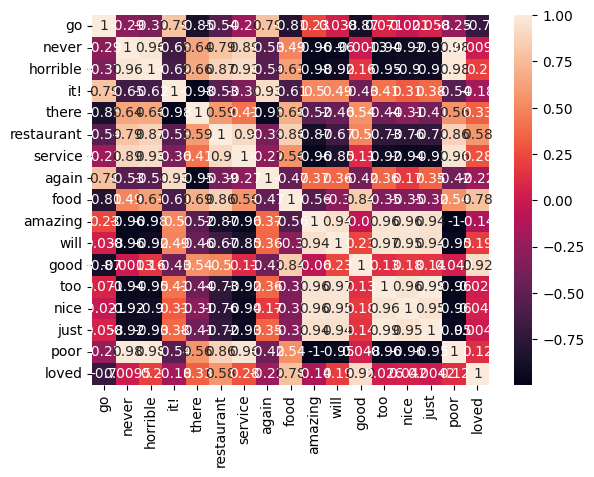

<Figure size 3000x3000 with 0 Axes>

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.figure(figsize=(30,30))
plt.show()